# Chapter 13: Statistics

## Imports

In [1]:
from scipy import stats
from scipy import optimize
import numpy as np
import random
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set(style="whitegrid")

## Descriptive statistics

In [3]:
x = np.array([3.5, 1.1, 3.2, 2.8, 6.7, 4.4, 0.9, 2.2, 4.5,6.4,7.3])

In [4]:
np.mean(x)

3.909090909090909

In [ ]:
np.median(x)

In [ ]:
x.min(), x.max()

In [6]:
x.var()

4.349917355371901

In [8]:
x.std()

2.0856455488341976

In [5]:
x.var(ddof=1)
# ddof = 1 calculate the unbiased estimate of the variance and standard deviation

4.784909090909091

In [7]:
x.std(ddof=1)

2.1874435057639983

## Random numbers

In [ ]:
random.seed(123456789)

In [9]:
random.random()

0.9418185307393341

In [10]:
random.randint(0, 10)  # 0 and 10 inclusive

6

In [ ]:
np.random.seed(123456789)

In [ ]:
np.random.rand()

In [ ]:
np.random.randn()

In [11]:
np.random.rand(5)

array([0.00711186, 0.80079775, 0.95672745, 0.84244897, 0.27890775])

In [12]:
np.random.randn(2, 4)

array([[ 0.58336888, -0.1404832 , -0.3949708 , -1.88302222],
       [ 0.24874554,  1.19132167, -1.34471785,  0.24882511]])

In [13]:
np.random.randint(10, size=10)

array([1, 6, 7, 4, 9, 3, 7, 7, 0, 3])

In [14]:
np.random.randint(low=10, high=20, size=(2, 10))

array([[15, 17, 10, 19, 13, 18, 15, 14, 11, 15],
       [11, 12, 14, 13, 17, 11, 17, 18, 18, 13]])

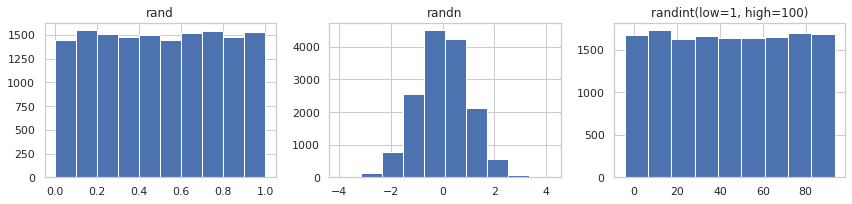

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))

axes[0].hist(np.random.rand(15000))
axes[0].set_title("rand")
axes[1].hist(np.random.randn(15000))
axes[1].set_title("randn")
axes[2].hist(np.random.randint(low=1, high=100, size=15000), bins=9, align='left')
axes[2].set_title("randint(low=1, high=100)")

fig.tight_layout()
# fig.savefig("ch13-random-hist.pdf")

In [ ]:
#random.sample(range(10), 5)

In [19]:
np.random.choice(5, 5, replace=False)

array([4, 0, 1, 3, 2])

In [ ]:
np.random.seed(123456789)

In [ ]:
np.random.rand()

In [ ]:
np.random.seed(123456789); np.random.rand()

In [ ]:
np.random.seed(123456789); np.random.rand()

In [20]:
prng = np.random.RandomState(89)
# No afecya al global, solo a las distribuciones generadas con la abreviación


In [25]:
prng.rand(2, 4)

array([[0.80603084, 0.19839124, 0.34528354, 0.53473647],
       [0.97858347, 0.5030445 , 0.3474475 , 0.21278653]])

In [22]:
np.random.rand(2,4)

array([[0.3329545 , 0.65526732, 0.31391573, 0.57436429],
       [0.43475179, 0.44206203, 0.48711329, 0.83378755]])

In [26]:
prng.chisquare(1, size=(2, 2))

array([[0.06297986, 0.07027909],
       [0.11512059, 0.08634769]])

In [ ]:
prng.standard_t(1, size=(2, 3))

In [ ]:
prng.f(5, 2, size=(2, 4))

In [ ]:
prng.binomial(10, 0.5, size=10)

In [ ]:
prng.poisson(5, size=10)

# Probability distributions and random variables

Table 13-1. Selected Methods for Discrete and Continuous Random Variables in
the SciPy stats Module:

Methods Description
* pdf/pmf Probability distribution function (continuous) or probability mass function (discrete).
* cdf Cumulative distribution function.
* sf Survival function (1 – cdf).
* ppf Percent-point function (inverse of cdf).
* moment Noncentral moments of nth order.
* stats Statistics of the distribution (typically the mean and variance, sometimes additional statistics)
* fit Fit distribution to data using a numerical maximum likelihood optimization (for continuous distributions).
* expect Expectation value of a function with respect to the distribution.
* interval The endpoints of the interval that contains a given percentage of the distribution (confidence interval).
* rvs Random variable samples. Takes as argument the size of the resulting array of samples.
* mean, median, std, var: Descriptive statistics: mean, median, standard deviation, and the variance of the
distribution.


In [33]:
np.random.seed(123456789)

In [34]:
X = stats.norm(1, 0.5)

In [35]:
X.mean()

1.0

In [36]:
X.moment(10)

120.22363281250003

In [ ]:
X.median()

In [ ]:
X.std()

In [ ]:
X.var()

In [37]:
[X.moment(n) for n in range(5)]

[1.0, 1.0, 1.25, 1.75, 2.6875]

In [9]:
X.stats()

(array(1.), array(0.25))

We can evaluate the probability distribution function, the cumulative distribution function, the survival function, etc., using the methods pdf, cdf, sf, etc.

In [13]:
X.pdf([0, 1, 2, 3])
# A probability density function (pdf) tells us the probability that a random variable takes on a certain value.

array([1.07981933e-01, 7.97884561e-01, 1.07981933e-01, 2.67660452e-04])

In [14]:
X.cdf([0, 1, 2,3])
# A cumulative distribution function (cdf) tells us the probability that a random variable takes on a value less than or equal to x.

array([0.02275013, 0.5       , 0.97724987, 0.99996833])

In [16]:
X.rvs(10)
# To generate a sequence of random variates according to the given probability distribution.

array([0.42913395, 0.02729888, 1.39224782, 1.82137282, 0.67965235,
       0.4967476 , 0.78940061, 0.71452742, 1.31150162, 0.63387305])

In [17]:
stats.norm(1, 0.5).stats()

(array(1.), array(0.25))

In [18]:
stats.norm.stats(loc=2, scale=0.5)

(array(2.), array(0.25))

In [24]:
X.interval(0.95)
# End points of the distribution

(0.020018007729972975, 1.979981992270027)

In [38]:
X.interval(0.99)

(-0.2879146517744502, 2.28791465177445)

In [25]:
def plot_rv_distribution(X, axes=None):
    """Plot the PDF, CDF, SF and PPF of a given random variable"""
    if axes is None:
        fig, axes = plt.subplots(1, 3, figsize=(12, 3))
    
    x_min_999, x_max_999 = X.interval(0.999)
    x999 = np.linspace(x_min_999, x_max_999, 1000)

    x_min_95, x_max_95 = X.interval(0.95)
    x95 = np.linspace(x_min_95, x_max_95, 1000)

    if hasattr(X.dist, 'pdf'):
        axes[0].plot(x999, X.pdf(x999), label="PDF")
        axes[0].fill_between(x95, X.pdf(x95), alpha=0.25)
    else:
        x999_int = np.unique(x999.astype(int))
        axes[0].bar(x999_int, X.pmf(x999_int), label="PMF")

    axes[1].plot(x999, X.cdf(x999), label="CDF")
    axes[1].plot(x999, X.sf(x999), label="SF")
    axes[2].plot(x999, X.ppf(x999), label="PPF")
    
    for ax in axes:
        ax.legend()
    
    return axes

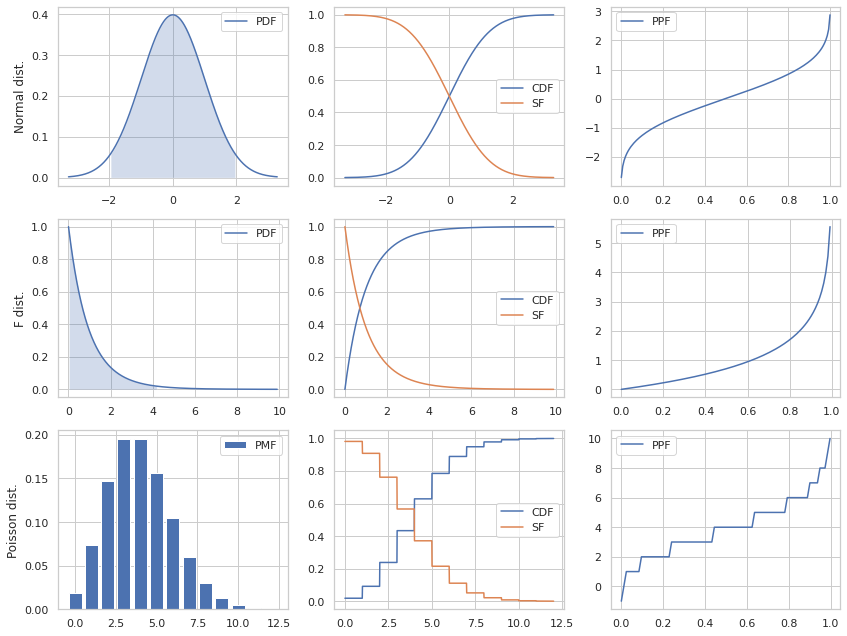

In [28]:
fig, axes = plt.subplots(3, 3, figsize=(12, 9))

X = stats.norm()
plot_rv_distribution(X, axes=axes[0, :])
axes[0, 0].set_ylabel("Normal dist.")
X = stats.f(2, 30)
plot_rv_distribution(X, axes=axes[1, :])
axes[1, 0].set_ylabel("F dist.")
X = stats.poisson(4)
plot_rv_distribution(X, axes=axes[2, :])
axes[2, 0].set_ylabel("Poisson dist.")

fig.tight_layout()
# fig.savefig("ch13-distributions.pdf")

In [48]:
def plot_dist_samples(X, X_samples, title=None, ax=None):
    """ Plot the PDF and histogram of samples of a continuous random variable"""
    # if ax is None:
    #     fig, ax = plt.subplots(1, 1, figsize=(8, 4))

    x_lim = X.interval(.99)
    x = np.linspace(*x_lim, num=100)

    ax.plot(x, X.pdf(x), label="PDF", lw=3)    
    ax.hist(X_samples, label="samples", bins=75, density=True)
    ax.set_xlim(*x_lim)
    ax.legend()
    
    if title:
        ax.set_title(title)
    return ax

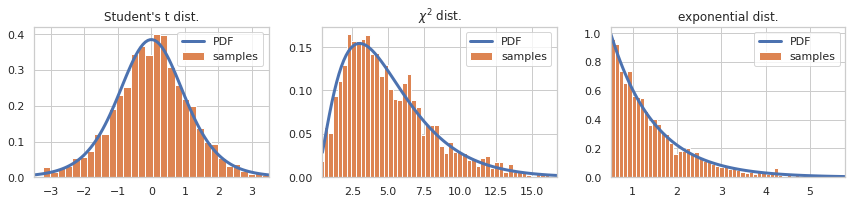

In [49]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))
X = stats.t(7.0)
plot_dist_samples(X, X.rvs(2000), "Student's t dist.", ax=axes[0])
X = stats.chi2(5.0)
plot_dist_samples(X, X.rvs(2000), r"$\chi^2$ dist.", ax=axes[1])
X = stats.expon(0.5)
plot_dist_samples(X, X.rvs(2000), "exponential dist.", ax=axes[2])
fig.tight_layout()
# fig.savefig("ch13-dist-sample.pdf")

In [50]:
X = stats.chi2(df=15)

In [51]:
X_samples = X.rvs(500)

In [52]:
df, loc, scale = stats.chi2.fit(X_samples)

In [53]:
df, loc, scale

(14.760832062462695, 0.13017889650450723, 0.9847746444539602)

In [54]:
Y = stats.chi2(df=df, loc=loc, scale=scale)

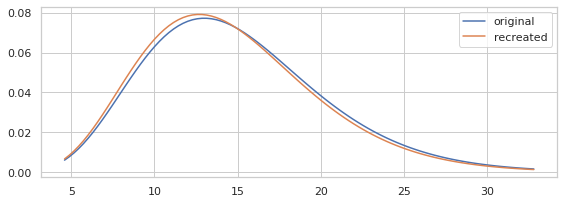

In [55]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3))

x_lim = X.interval(.99)
x = np.linspace(*x_lim, num=100)

ax.plot(x, X.pdf(x), label="original")
ax.plot(x, Y.pdf(x), label="recreated")
ax.legend()

fig.tight_layout()
# fig.savefig("ch13-max-likelihood-fit.pdf")

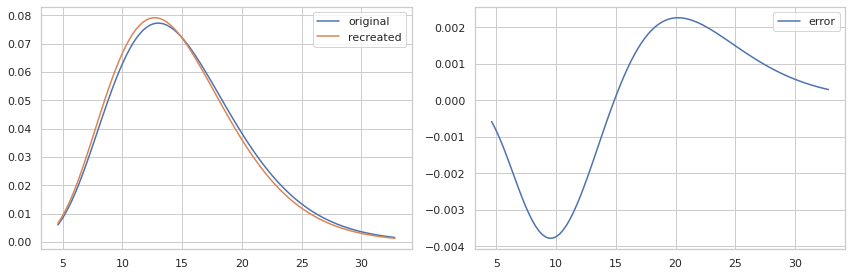

In [56]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

x_lim = X.interval(.99)
x = np.linspace(*x_lim, num=100)

axes[0].plot(x, X.pdf(x), label="original")
axes[0].plot(x, Y.pdf(x), label="recreated")
axes[0].legend()

axes[1].plot(x, X.pdf(x) - Y.pdf(x), label="error")
axes[1].legend()

fig.tight_layout()
# fig.savefig("ch13-max-likelihood-fit.pdf")

# Hypothesis testing

* Test if the mean of a population is a given value.
Normal distribution (stats.norm), or Student’s t distribution (stats.t)
stats.
ttest_1samp
* Test if the means of two random variables are equal (independent or paired samples).
Student’s t distribution (stats.t)
stats.ttest_ind, stats.ttest_rel
* Test goodness of fit of a continuous distribution to data.
Kolmogorov-Smirnov distribution
stats.kstest
* Test if categorical data occur with given frequency (sum of squared normally distributed variables).
χ2 distribution (stats.chi2) stats.chisquare
* Test for the independence of categorical variables in a contingency table.
χ2 distribution (stats.chi2) stats.chi2_contingency
* Test for equal variance in samples of two or more variables.
F distribution (stats.f) stats.barlett, stats.levene
* Test for noncorrelation between two variables.
Beta distribution (stats.beta,stasts.mstats.betai)
stats.pearsonr, stats.spearmanr
* Test if two or more variables have the same population mean (ANOVA – analysis of variance) .
F distribution stats.f_oneway, stats.kruskal

In [4]:
np.random.seed(12)

In [5]:
mu, sigma = 3.0, 0.5

In [6]:
X = stats.norm(mu-0.2, sigma)

In [7]:
n = 100

In [9]:
X_samples = X.rvs(n)
X_samples

array([2.11718009, 2.20277781, 2.80796727, 2.75997827, 2.67459864,
       2.51742855, 2.24866403, 2.40885878, 4.3208431 , 2.48695939,
       3.55295046, 2.50633196, 3.48292646, 3.41602244, 3.02544462,
       2.47929509, 2.11120198, 3.28287317, 2.15799827, 2.16271395,
       3.56142088, 3.53094122, 2.81882798, 2.6769014 , 2.46785121,
       2.97566777, 2.55798428, 2.04345637, 2.41823476, 2.9246016 ,
       2.0050957 , 2.31023704, 2.86138081, 3.64464605, 2.88887493,
       2.81600301, 3.76660778, 2.26895264, 2.43368545, 3.2213707 ,
       3.33836999, 3.02884527, 1.49025334, 3.16952317, 3.13375053,
       2.82320132, 3.1330388 , 3.50397424, 2.82557459, 2.33201257,
       1.88044535, 2.83188936, 2.44301595, 2.51905767, 2.23376557,
       2.9371455 , 3.16795606, 3.01715937, 2.23997945, 3.24454731,
       2.95725347, 1.55599777, 3.09795431, 1.78206898, 2.23085917,
       3.32882114, 3.12638427, 2.47776657, 2.35826895, 2.97284619,
       1.90158627, 3.00535481, 2.65408828, 3.16707382, 2.73725

In [10]:
z = (X_samples.mean() - mu)/(sigma/np.sqrt(n))
z

-6.16243598089766

In [12]:
t = (X_samples.mean() - mu)/(X_samples.std(ddof=1)/np.sqrt(n))
t
# calculates to compute the sample standard deviation

-5.973895964965421

In [14]:
# For a two-sided hypothesis test of significance level 5% (2.5% on each side)
stats.norm().ppf(0.025)

-1.9599639845400545

In [15]:
2 * stats.norm().cdf(-abs(z)) # p-value

7.163429535692847e-10

In [21]:
2 * stats.t(df=(n-1)).cdf(-abs(t))
# p-value of t-statistics

3.6514631691069086e-08

3.6514631691069086e-08

In [23]:
t= stats.ttest_1samp(X_samples, mu)
print(t)

Ttest_1sampResult(statistic=-5.97389596496542, pvalue=3.6514631691069086e-08)


/home/dani/anaconda3/envs/fm/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


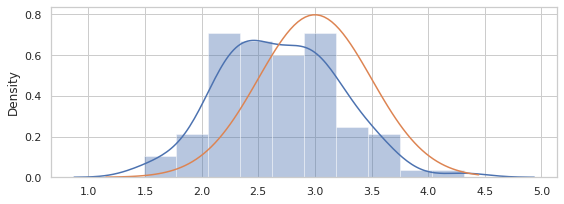

In [32]:
fig, ax = plt.subplots(figsize=(8, 3))

sns.distplot(X_samples)
x = np.linspace(*X.interval(0.999), num=100)
ax.plot(x, stats.norm(loc=mu, scale=sigma).pdf(x))

fig.tight_layout()
# fig.savefig("ch13-hypothesis-test-dist-sample-mean.pdf")

In [33]:
n = 500

In [34]:
mu1, mu2 = np.random.rand(2)

In [35]:
X1 = stats.norm(mu1, sigma)

In [36]:
X1_sample = X1.rvs(n)

In [37]:
X2 = stats.norm(mu2, sigma)

In [38]:
X2_sample = X2.rvs(n)

In [39]:
t, p = stats.ttest_ind(X1_sample, X2_sample)

In [40]:
print(t, p)

-4.047314990272432 5.581362976178963e-05


In [41]:
mu1, mu2

(0.037941219451945285, 0.1550112869052518)

/home/dani/anaconda3/envs/fm/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/dani/anaconda3/envs/fm/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

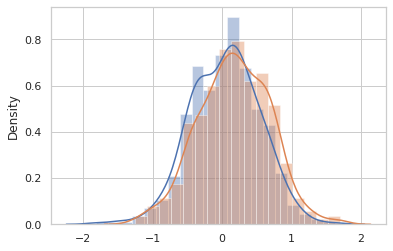

In [42]:
sns.distplot(X1_sample)
sns.distplot(X2_sample)

# Nonparameteric methods

In [43]:
np.random.seed(0)

In [44]:
X = stats.chi2(df=5)

In [52]:
X_samples = X.rvs(100)

In [53]:
kde = stats.kde.gaussian_kde(X_samples)

In [54]:
kde_low_bw = stats.kde.gaussian_kde(X_samples, bw_method=0.25)

In [55]:
x = np.linspace(0, 20, 100)

/home/dani/anaconda3/envs/fm/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


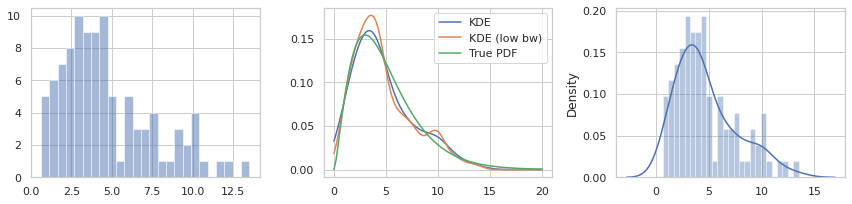

In [56]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))

axes[0].hist(X_samples, alpha=0.5, bins=25)
axes[1].plot(x, kde(x), label="KDE")
axes[1].plot(x, kde_low_bw(x), label="KDE (low bw)")
axes[1].plot(x, X.pdf(x), label="True PDF")
axes[1].legend()
sns.distplot(X_samples, bins=25, ax=axes[2])

fig.tight_layout()
# fig.savefig("ch13-hist-kde.pdf")

In [57]:
kde.resample(10)

array([[0.61147454, 1.75536002, 7.70079782, 4.71979055, 7.60168323,
        1.19368059, 1.77975238, 2.71517499, 5.95816573, 1.42172886]])

In [58]:
def _kde_cdf(x):
    return kde.integrate_box_1d(-np.inf, x)

In [59]:
kde_cdf = np.vectorize(_kde_cdf)

/home/dani/anaconda3/envs/fm/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


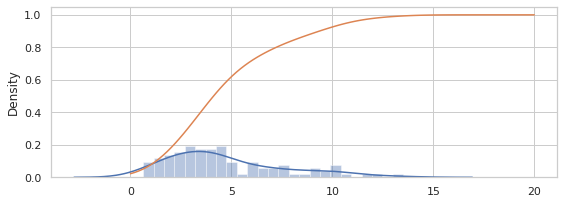

In [65]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3))

sns.distplot(X_samples, bins=25, ax=ax)
x = np.linspace(0, 20, 100)
ax.plot(x, kde_cdf(x))

fig.tight_layout()

In [61]:
def _kde_ppf(q):
    return optimize.fsolve(lambda x, q: kde_cdf(x) - q, kde.dataset.mean(), args=(q,))[0]

In [62]:
kde_ppf = np.vectorize(_kde_ppf)

In [63]:
kde_ppf([0.05, 0.95])

array([ 0.61493028, 10.73622426])

In [64]:
X.ppf([0.05, 0.95])

array([ 1.14547623, 11.07049769])

# Versions

In [ ]:
%reload_ext version_information

In [ ]:
%version_information numpy, scipy, matplotlib, seaborn

In [ ]:
lines = """alpha             -- Alpha
       anglit            -- Anglit
       arcsine           -- Arcsine
       argus             -- Argus
       beta              -- Beta
       betaprime         -- Beta Prime
       bradford          -- Bradford
       burr              -- Burr (Type III)
       burr12            -- Burr (Type XII)
       cauchy            -- Cauchy
       chi               -- Chi
       chi2              -- Chi-squared
       cosine            -- Cosine
       crystalball       -- Crystalball
       dgamma            -- Double Gamma
       dweibull          -- Double Weibull
       erlang            -- Erlang
       expon             -- Exponential
       exponnorm         -- Exponentially Modified Normal
       exponweib         -- Exponentiated Weibull
       exponpow          -- Exponential Power
       f                 -- F (Snecdor F)
       fatiguelife       -- Fatigue Life (Birnbaum-Saunders)
       fisk              -- Fisk
       foldcauchy        -- Folded Cauchy
       foldnorm          -- Folded Normal
       frechet_r         -- Deprecated. Alias for weibull_min
       frechet_l         -- Deprecated. Alias for weibull_max
       genlogistic       -- Generalized Logistic
       gennorm           -- Generalized normal
       genpareto         -- Generalized Pareto
       genexpon          -- Generalized Exponential
       genextreme        -- Generalized Extreme Value
       gausshyper        -- Gauss Hypergeometric
       gamma             -- Gamma
       gengamma          -- Generalized gamma
       genhalflogistic   -- Generalized Half Logistic
       gilbrat           -- Gilbrat
       gompertz          -- Gompertz (Truncated Gumbel)
       gumbel_r          -- Right Sided Gumbel, Log-Weibull, Fisher-Tippett, Extreme Value Type I
       gumbel_l          -- Left Sided Gumbel, etc.
       halfcauchy        -- Half Cauchy
       halflogistic      -- Half Logistic
       halfnorm          -- Half Normal
       halfgennorm       -- Generalized Half Normal
       hypsecant         -- Hyperbolic Secant
       invgamma          -- Inverse Gamma
       invgauss          -- Inverse Gaussian
       invweibull        -- Inverse Weibull
       johnsonsb         -- Johnson SB
       johnsonsu         -- Johnson SU
       kappa4            -- Kappa 4 parameter
       kappa3            -- Kappa 3 parameter
       ksone             -- Kolmogorov-Smirnov one-sided (no stats)
       kstwobign         -- Kolmogorov-Smirnov two-sided test for Large N (no stats)
       laplace           -- Laplace
       levy              -- Levy
       levy_l
       levy_stable
       logistic          -- Logistic
       loggamma          -- Log-Gamma
       loglaplace        -- Log-Laplace (Log Double Exponential)
       lognorm           -- Log-Normal
       lomax             -- Lomax (Pareto of the second kind)
       maxwell           -- Maxwell
       mielke            -- Mielke's Beta-Kappa
       moyal             -- Moyal
       nakagami          -- Nakagami
       ncx2              -- Non-central chi-squared
       ncf               -- Non-central F
       nct               -- Non-central Student's T
       norm              -- Normal (Gaussian)
       norminvgauss      -- Normal Inverse Gaussian
       pareto            -- Pareto
       pearson3          -- Pearson type III
       powerlaw          -- Power-function
       powerlognorm      -- Power log normal
       powernorm         -- Power normal
       rdist             -- R-distribution
       reciprocal        -- Reciprocal
       rayleigh          -- Rayleigh
       rice              -- Rice
       recipinvgauss     -- Reciprocal Inverse Gaussian
       semicircular      -- Semicircular
       skewnorm          -- Skew normal
       t                 -- Student's T
       trapz              -- Trapezoidal
       triang            -- Triangular
       truncexpon        -- Truncated Exponential
       truncnorm         -- Truncated Normal
       tukeylambda       -- Tukey-Lambda
       uniform           -- Uniform
       vonmises          -- Von-Mises (Circular)
       vonmises_line     -- Von-Mises (Line)
       wald              -- Wald
       weibull_min       -- Minimum Weibull (see Frechet)
       weibull_max       -- Maximum Weibull (see Frechet)
       wrapcauchy        -- Wrapped Cauchy"""

In [ ]:
len(lines.split("\n"))

In [ ]:
help(stats)